In [ ]:
#Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Verinin aktarılması ve ilk beş satırının okunması.
data = pd.read_csv("/Users/eceguney/Desktop/VERİ BİLİMİ DERS NOTLARI/KOD ÇALIŞMALARIM/weather_forecasting/DailyDelhiClimateTrain.csv")
print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [ ]:
#DataFrame'deki sayısal sütunlara ait istatistiksel bilgilerin ekrana yazdırılması.
print(data.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


In [ ]:
#Genel özelliklerin ekrana yazdırılması.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [ ]:
#İnteraktif grafikler oluşturulması için plotly kütüphanesinin içe aktarılması.
%pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 6.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Çizgi grafiği oluşturmak için plotly.express kütüphanesinin içe aktarılması ve grafiğin çizilmesi.
import plotly.express as px
figure = px.line(data, x="date", 
                 y="meantemp", 
                 title='Mean Temperature in Delhi Over the Years')
figure.show()

In [ ]:
#Delhi'nin yıllar içindeki nem değişimini görselleştirmek için bir çizgi grafiği oluşturulması.
figure = px.line(data, x="date", 
                 y="humidity", 
                 title='Humidity in Delhi Over the Years')
figure.show()

In [ ]:
#Delhi'deki yıllık rüzgar hızı değişimini görselleştiren bir çizgi grafiğinin oluşturulması.
figure = px.line(data, x="date", 
                 y="wind_speed", 
                 title='Wind Speed in Delhi Over the Years')
figure.show()

In [ ]:
# Statsmodels kütüphanesinin yüklenmesi.
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 6.6 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Statsmodels, istatistiksel modellerin ve ekonometrik analizlerin oluşturulmasına olanak tanıyan bir Python kütüphanesidir. Genellikle regresyon analizi, hipotez testleri ve çeşitli istatistiksel analizler için kullanılır.

In [ ]:
#Plotly Express kullanarak nem ve sıcaklık arasındaki ilişkiyi görselleştiren bir dağılım grafiğinin (scatter plot) oluşturulması.
import plotly.express as px

figure = px.scatter(data_frame=data, x="humidity",
                    y="meantemp", size="meantemp", 
                    trendline="ols", 
                    title="Relationship Between Temperature and Humidity")
figure.show()

In [ ]:
#data adlı veri çerçevesindeki tarih sütununu dönüştürerek ve yeni sütunlar ekleyerek tarih bilgilerini ayrılması ve düzenlenmesi.
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


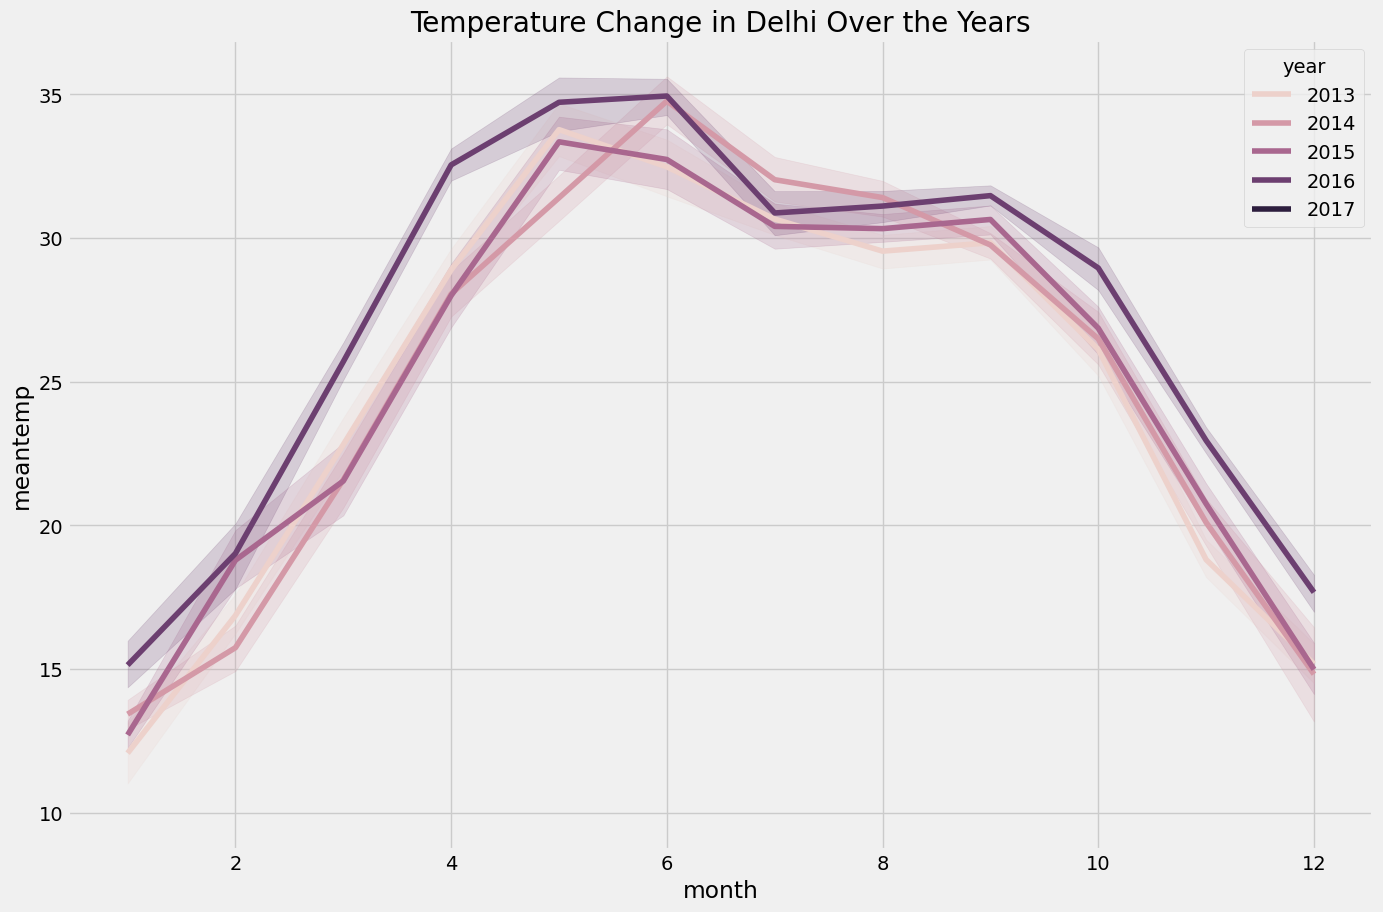

In [ ]:
#Matplotlib ve Seaborn kütüphanelerini kullanarak Delhi'de yıllar içindeki sıcaklık değişimini gösteren bir çizgi grafiği oluşturulması.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

In [ ]:
#Python ortamınıza Prophet kütüphanesinin yüklenmesi.
%pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 6.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Prophet, Facebook tarafından geliştirilmiş ve zaman serisi verilerini modellemek için kullanılan açık kaynaklı bir kütüphanedir. Özellikle mevsimsel desenler, tatil etkileri ve trend değişimlerini anlamak ve tahmin yapmak için kullanışlıdır.

In [ ]:
#data veri çerçevesindeki sütun adlarını, Prophet kütüphanesinin kullandığı formatla uyumlu olacak şekilde yeniden adlandırılması.
forecast_data = data.rename(columns = {"date": "ds", 
                                       "meantemp": "y"})
print(forecast_data)

             ds          y    humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]


In [ ]:
#Prophet kütüphanesini kullanarak bir zaman serisi tahmini yapılması ve tahmin sonuçlarını görselleştirilmesi.
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

14:59:49 - cmdstanpy - INFO - Chain [1] start processing
14:59:50 - cmdstanpy - INFO - Chain [1] done processing
